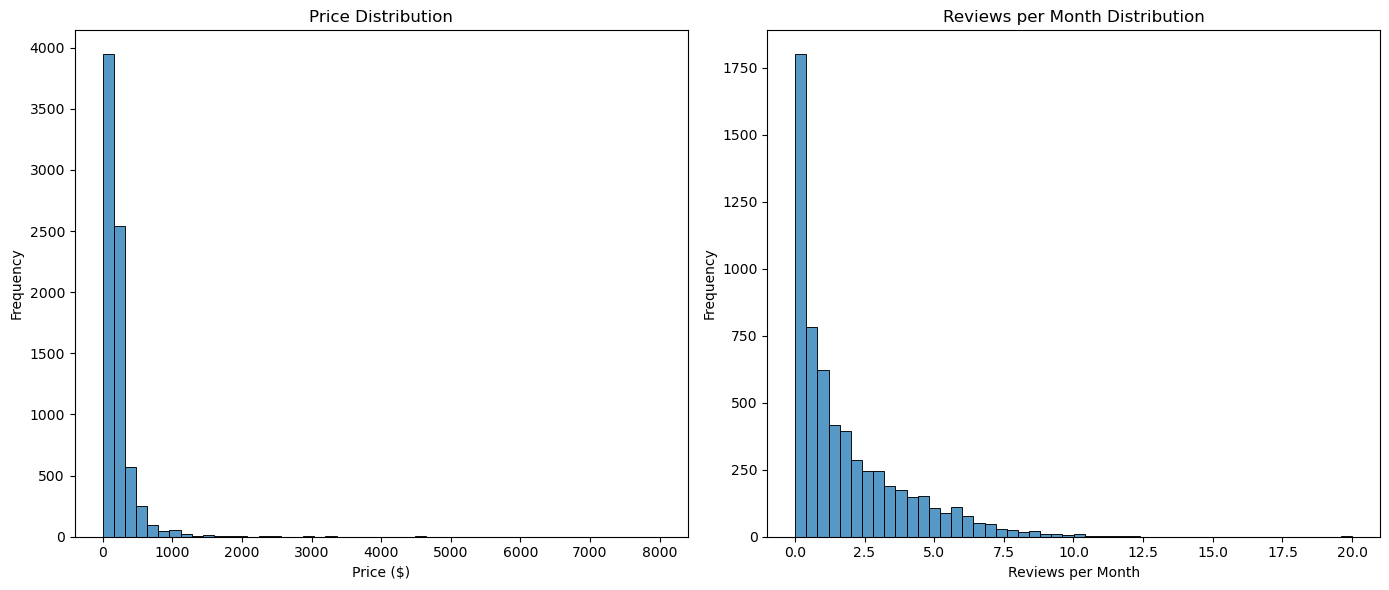

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('sf_airbnb listings.csv')

# Cleaning up the price column to remove any non-numeric characters and converting it to float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Setting up the plotting area
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for Price Distribution
sns.histplot(data['price'], bins=50, ax=ax[0])
ax[0].set_title('Price Distribution')
ax[0].set_xlabel('Price ($)')
ax[0].set_ylabel('Frequency')

# Histogram for Reviews Per Month Distribution
sns.histplot(data['reviews_per_month'].dropna(), bins=50, ax=ax[1])
ax[1].set_title('Reviews per Month Distribution')
ax[1].set_xlabel('Reviews per Month')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Assume df is your DataFrame
data.to_csv('SFListings2.csv', index=False)


In [3]:
data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,2.019060e+13,6/2/19,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.60
1,5858,https://www.airbnb.com/rooms/5858,2.019060e+13,6/2/19,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.90
2,7918,https://www.airbnb.com/rooms/7918,2.019060e+13,6/2/19,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
3,8142,https://www.airbnb.com/rooms/8142,2.019060e+13,6/2/19,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.14
4,8339,https://www.airbnb.com/rooms/8339,2.019060e+13,6/2/19,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,NaN,...,f,f,moderate,t,t,2,2,0,0,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7570,35284961,https://www.airbnb.com/rooms/35284961,2.019060e+13,6/2/19,Brand New Designer 2 BR SF Condo,Luxury spacious 2 bedroom condo located in SF‚...,Private dedicated entrance NEST temperature c...,Luxury spacious 2 bedroom condo located in SF‚...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,NaN
7571,35285751,https://www.airbnb.com/rooms/35285751,2.019060e+13,6/2/19,Beautiful 1x1 in Historic Mission Tudor Building,A beautifully remodeled one bedroom in a great...,NaN,A beautifully remodeled one bedroom in a great...,none,NaN,...,f,f,flexible,f,f,92,91,1,0,NaN
7572,35286441,https://www.airbnb.com/rooms/35286441,2.019060e+13,6/2/19,Beautiful Queen Victorian in the heart of Mission,Our place is a charming Victorian located in t...,The house is a quintessential remodeled Victor...,Our place is a charming Victorian located in t...,none,Mission District is one of the fastest growing...,...,t,f,moderate,f,f,2,1,1,0,NaN
7573,35288483,https://www.airbnb.com/rooms/35288483,2.019060e+13,6/2/19,"New comfortable, convenient place for family","This new place is comfortable, with easy commu...",NaN,"This new place is comfortable, with easy commu...",none,Walking distance to Golden Gate Park and Ocean...,...,t,f,strict_14_with_grace_period,f,f,3,2,1,0,NaN


In [4]:
data.describe

<bound method NDFrame.describe of             id                            listing_url     scrape_id  \
0          958       https://www.airbnb.com/rooms/958  2.019060e+13   
1         5858      https://www.airbnb.com/rooms/5858  2.019060e+13   
2         7918      https://www.airbnb.com/rooms/7918  2.019060e+13   
3         8142      https://www.airbnb.com/rooms/8142  2.019060e+13   
4         8339      https://www.airbnb.com/rooms/8339  2.019060e+13   
...        ...                                    ...           ...   
7570  35284961  https://www.airbnb.com/rooms/35284961  2.019060e+13   
7571  35285751  https://www.airbnb.com/rooms/35285751  2.019060e+13   
7572  35286441  https://www.airbnb.com/rooms/35286441  2.019060e+13   
7573  35288483  https://www.airbnb.com/rooms/35288483  2.019060e+13   
7574  35291911  https://www.airbnb.com/rooms/35291911  2.019060e+13   

     last_scraped                                               name  \
0          6/2/19                Bright, 

In [5]:
# Filtering highly rated listings
highly_rated_listings = data[data['review_scores_rating'] >= 98]

# Analyzing amenities
# As 'amenities' might be stored as a string of list, we'll convert it and check common amenities
highly_rated_listings['amenities'] = highly_rated_listings['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))

# Creating a flat list of all amenities
from collections import Counter
amenities_list = [amenity for sublist in highly_rated_listings['amenities'] for amenity in sublist]
amenities_count = Counter(amenities_list)

# Most common amenities in highly rated listings
most_common_amenities = amenities_count.most_common(10)

# Display the most common amenities
most_common_amenities


C:\Users\Taghi Jalilov\AppData\Local\Temp\ipykernel_21980\1186226650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highly_rated_listings['amenities'] = highly_rated_listings['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))


[('Wifi', 3124),
 ('Essentials', 3090),
 ('Smoke detector', 3026),
 ('Heating', 3022),
 ('Hangers', 2924),
 ('Hair dryer', 2878),
 ('Shampoo', 2846),
 ('Iron', 2777),
 ('Carbon monoxide detector', 2737),
 ('Laptop friendly workspace', 2656)]

C:\Users\Taghi Jalilov\AppData\Local\Temp\ipykernel_21980\2253299474.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highly_rated_listings['amenities_list'] = highly_rated_listings['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))


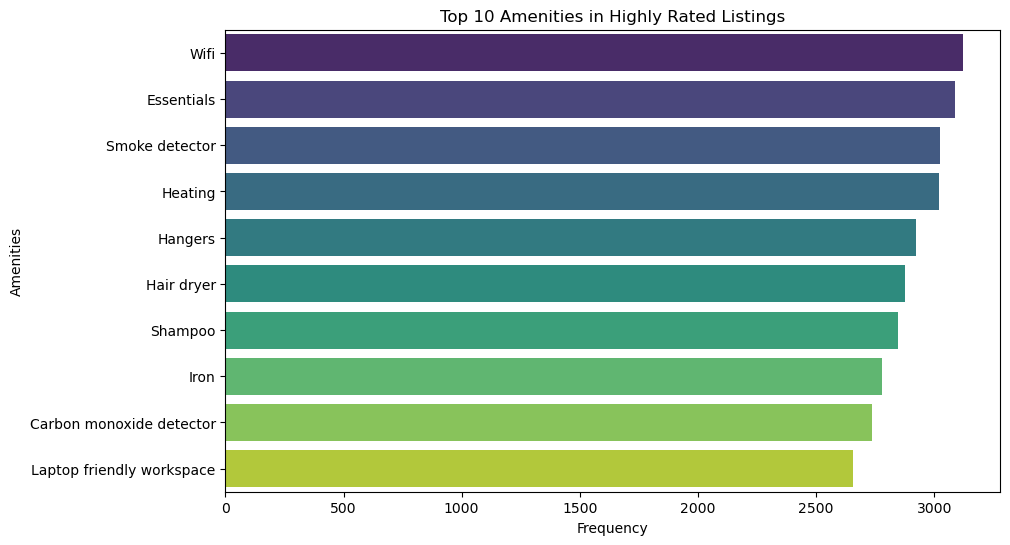

In [6]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the data is filtered and the 'amenities' column is processed properly
highly_rated_listings = data[data['review_scores_rating'] >= 98]
highly_rated_listings['amenities_list'] = highly_rated_listings['amenities'].apply(lambda x: x.strip('{}').replace('"', '').split(','))
amenities_flat_list = [item for sublist in highly_rated_listings['amenities_list'] for item in sublist]
amenities_count = Counter(amenities_flat_list)

# Most common amenities visualization
top_amenities = pd.DataFrame(amenities_count.most_common(10), columns=['Amenity', 'Count'])

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_amenities, x='Count', y='Amenity', palette='viridis')
plt.title('Top 10 Amenities in Highly Rated Listings')
plt.xlabel('Frequency')
plt.ylabel('Amenities')
plt.show()


In [7]:
df= data

**Popularity Analysis**

Top 10 Popular Listings:
                                                   name  reviews_per_month
112                  Spacious Edwardian Flat SF Mission              20.00
6989                     Beautiful castro garden studio              12.35
4626  Designer Space in Sunny+Walkable Mission District              12.31
6247  Cozy‚òÖrenovated‚òÖquiet in-law for 2‚òÖbackya...              12.18
4346  Designer Space in Sunny, Walkable Mission Dist...              12.06
5679  Cute garden studio with hot tub in Bernal Heights              11.84
5592       Amazing room in the Outer Richmond district!              11.38
7286  Clean room with Cal King bed in big, modern house              11.00
6711                                            KT Home              10.97
2124                              Great Castro location              10.76


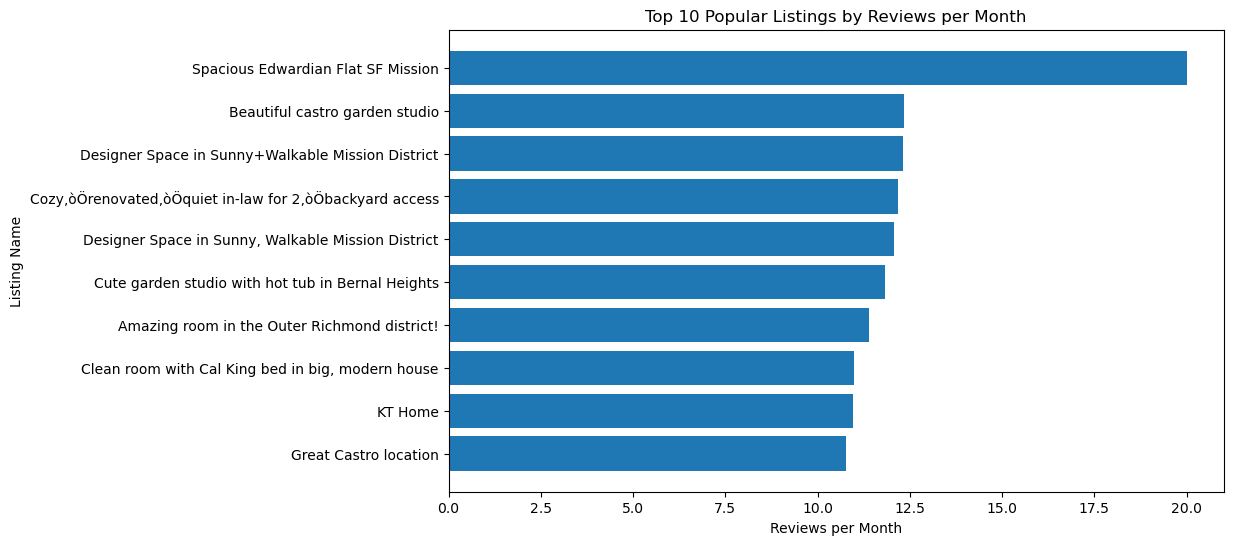

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('SFListings.csv')

# Analyze the top 10 popular listings by reviews per month
popular_listings = df[['name', 'reviews_per_month']].nlargest(10, 'reviews_per_month')
print("Top 10 Popular Listings:")
print(popular_listings)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(popular_listings['name'], popular_listings['reviews_per_month'])
plt.xlabel('Reviews per Month')
plt.ylabel('Listing Name')
plt.title('Top 10 Popular Listings by Reviews per Month')
plt.gca().invert_yaxis()
plt.show()


**Price Analysis**

Average Price by Room Type:
room_type
Shared room         76.894273
Private room       143.725027
Entire home/apt    264.857671
Name: price, dtype: float64


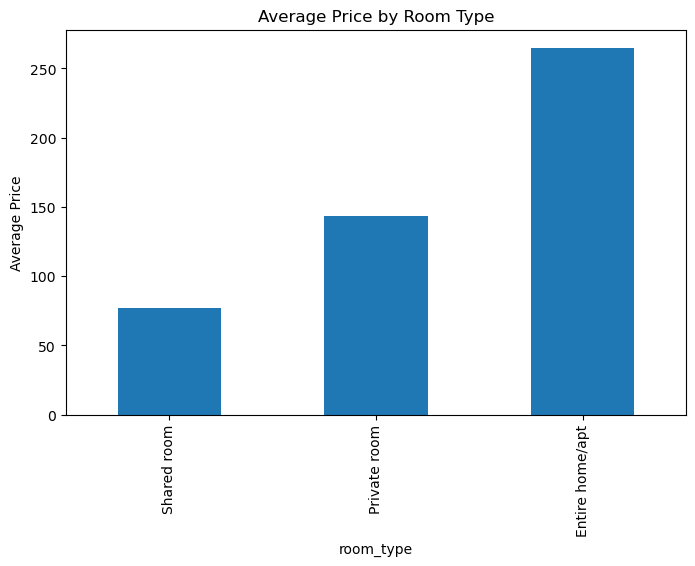

In [9]:
# Analyzing price correlations with room type
price_room_type = df.groupby('room_type')['price'].mean().sort_values()
print("Average Price by Room Type:")
print(price_room_type)

# Plot
plt.figure(figsize=(8, 5))
price_room_type.plot(kind='bar')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type')
plt.show()


**Host analysis**

In [10]:
# Analyzing hosts with multiple listings
hosts_multiple_listings = df[df['calculated_host_listings_count'] > 1]
average_reviews = hosts_multiple_listings.groupby('host_id')['reviews_per_month'].mean()

print("Average Reviews per Month for Hosts with Multiple Listings:")
print(average_reviews.head(10))  # Display the first 10 for brevity


Average Reviews per Month for Hosts with Multiple Listings:
host_id
4921     8.0400
7149     3.0550
10135    3.1275
16382    1.5500
18732    1.1150
21994    0.1375
23278    3.7075
24215    0.1400
26860    2.0000
26952    0.7850
Name: reviews_per_month, dtype: float64


**Location Based Trends**

Average Reviews per Month by Neighborhood:
neighbourhood
Portola              4.178182
Presidio             3.870000
Outer Sunset         3.395401
Visitacion Valley    3.264600
Forest Hill          2.913571
Diamond Heights      2.792222
West Portal          2.579000
Bayview              2.575286
Richmond District    2.515987
Mission Terrace      2.508667
Name: reviews_per_month, dtype: float64


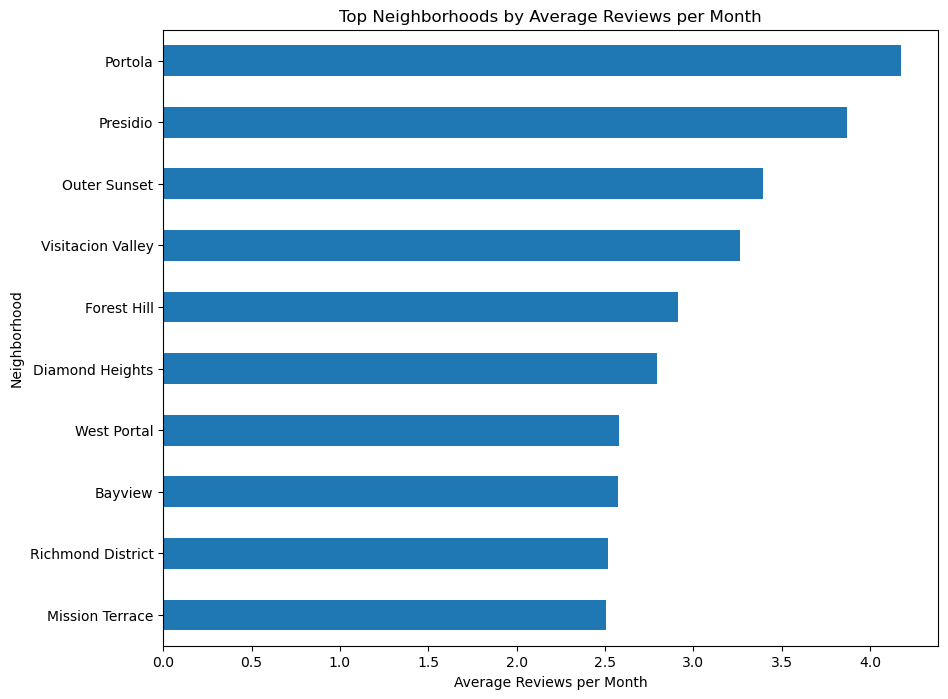

In [11]:
# Analyzing listings by neighborhood
neighborhood_trends = df.groupby('neighbourhood')['reviews_per_month'].mean().sort_values(ascending=False)
print("Average Reviews per Month by Neighborhood:")
print(neighborhood_trends.head(10))

# Plot
plt.figure(figsize=(10, 8))
neighborhood_trends.head(10).plot(kind='barh')
plt.xlabel('Average Reviews per Month')
plt.ylabel('Neighborhood')
plt.title('Top Neighborhoods by Average Reviews per Month')
plt.gca().invert_yaxis()
plt.show()


In [12]:
import numpy as np

Correlation Matrix:
                   log_price  reviews_per_month  accommodates  bedrooms
log_price           1.000000          -0.190859      0.595138  0.542704
reviews_per_month  -0.190859           1.000000     -0.110679 -0.150324
accommodates        0.595138          -0.110679      1.000000  0.761846
bedrooms            0.542704          -0.150324      0.761846  1.000000


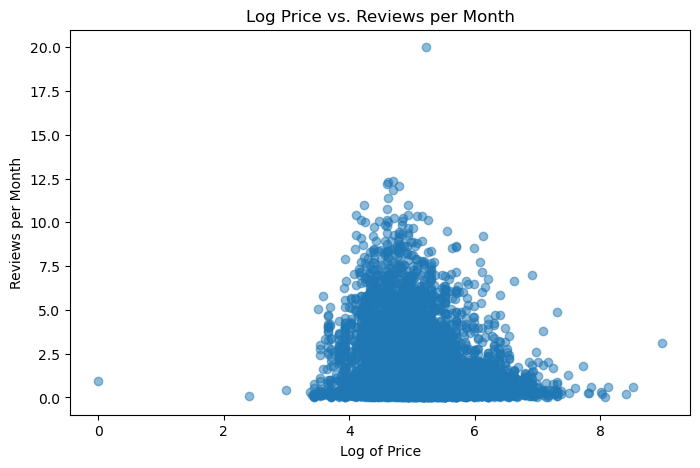

In [13]:
# Correlating price with reviews and other factors
df['log_price'] = np.log(df['price'] + 1)  # Log-transforming prices to normalize distribution
correlation_matrix = df[['log_price', 'reviews_per_month', 'accommodates', 'bedrooms']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Scatter plot of price vs. reviews
plt.figure(figsize=(8, 5))
plt.scatter(df['log_price'], df['reviews_per_month'], alpha=0.5)
plt.title('Log Price vs. Reviews per Month')
plt.xlabel('Log of Price')
plt.ylabel('Reviews per Month')
plt.show()


# Sentiment Analysis

In [14]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------------------ --------------------- 297.0/626.3 kB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 6.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Average Sentiment by Neighborhood:
neighbourhood
Dogpatch                 0.315616
Nob Hill                 0.303933
Hayes Valley             0.302918
Marina                   0.294336
Daly City                0.292553
Potrero Hill             0.290686
Fisherman''''s Wharf     0.290636
Pacific Heights          0.283901
Forest Hill              0.280102
Western Addition/NOPA    0.278698
Name: description_sentiment, dtype: float64


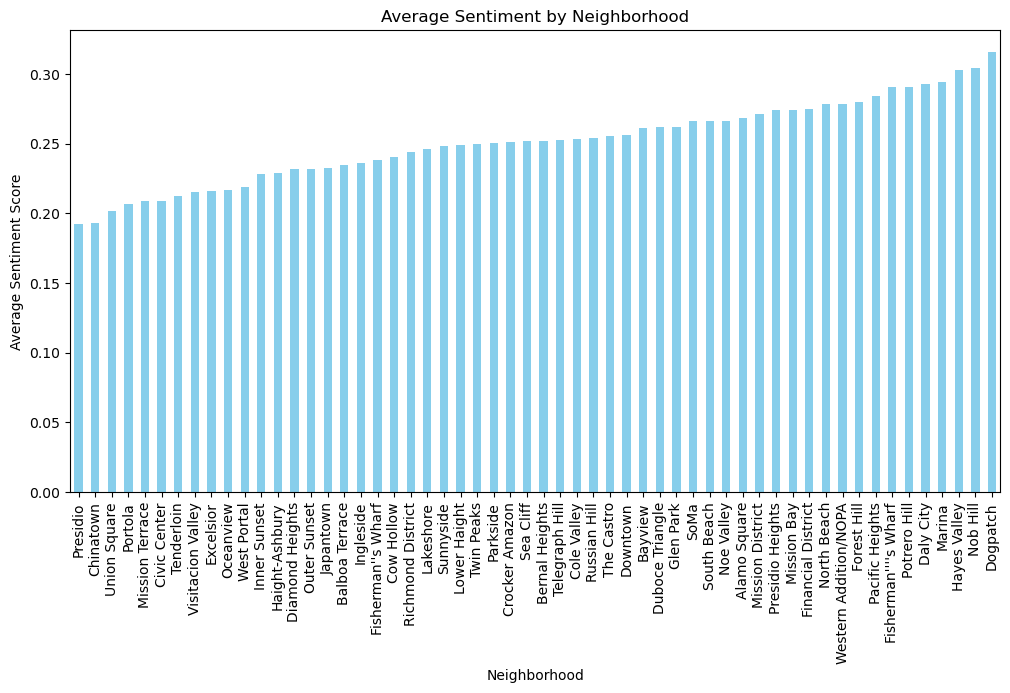

In [15]:
import pandas as pd
from textblob import TextBlob

# Load the data
df = pd.read_csv('SFListings2.csv')

# Function to get the sentiment
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

# Applying the sentiment analysis function
df['description_sentiment'] = df['description'].apply(get_sentiment)

# Display average sentiment by neighborhood if 'neighbourhood' is available
average_sentiment = df.groupby('neighbourhood')['description_sentiment'].mean()
print("Average Sentiment by Neighborhood:")
print(average_sentiment.sort_values(ascending=False).head(10))  # Top 10 neighborhoods by average sentiment

# Optional: Plot the results
average_sentiment.sort_values().plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Sentiment by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Sentiment Score')
plt.show()


### Analyzing the Sentiment Chart:
- **High Sentiment Neighborhoods**: These areas might be described in more glowing terms, possibly due to popular attractions, better amenities, or simply being more desirable for visitors and residents.
- **Low Sentiment Neighborhoods**: Lower scores could indicate less favorable descriptions, which might stem from various factors like less appealing attributes or fewer amenities.

In [16]:
from textblob import TextBlob
import pandas as pd



# Define a function to calculate sentiment
def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None

# Apply the function to your text column, assuming the column is 'description'
df['description_sentiment'] = df['description'].apply(get_sentiment)


In [17]:
# Check the first few rows to confirm the 'description_sentiment' column exists
print(df.head())


     id                        listing_url     scrape_id last_scraped  \
0   958   https://www.airbnb.com/rooms/958  2.019060e+13       6/2/19   
1  5858  https://www.airbnb.com/rooms/5858  2.019060e+13       6/2/19   
2  7918  https://www.airbnb.com/rooms/7918  2.019060e+13       6/2/19   
3  8142  https://www.airbnb.com/rooms/8142  2.019060e+13       6/2/19   
4  8339  https://www.airbnb.com/rooms/8339  2.019060e+13       6/2/19   

                                                name  \
0                Bright, Modern Garden Unit - 1BR/1B   
1                                 Creative Sanctuary   
2         A Friendly Room - UCSF/USF - San Francisco   
3  Friendly Room Apt. Style -UCSF/USF - San Franc...   
4                    Historic Alamo Square Victorian   

                                             summary  \
0  New update: the house next door is under const...   
1                                                NaN   
2  Nice and good public transportation.  7 minute...   


In [18]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'description_sentiment'],
      dtype='object', length=107)

In [19]:
# Display column types to verify
print(df[['price', 'number_of_reviews', 'availability_365', 'description_sentiment']].dtypes)

# Convert 'availability_365' if it's not already an integer
df['availability_365'] = df['availability_365'].astype(int)


price                    float64
number_of_reviews          int64
availability_365           int64
description_sentiment    float64
dtype: object


**Correlation Analysis**

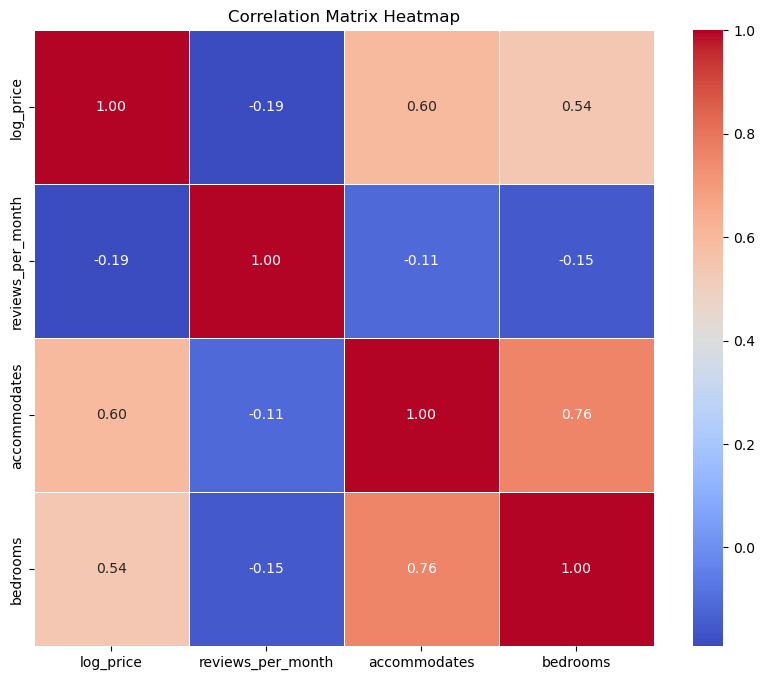

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


**Notable Correlations**

log_price and accommodates (0.60):
A strong positive correlation suggests that listings that can accommodate more people tend to have higher prices. This makes sense as larger properties can host more guests.
log_price and bedrooms (0.54):
Similar to the above, a positive correlation indicating that listings with more bedrooms tend to be priced higher, likely reflecting larger overall property size.
reviews_per_month and log_price (-0.19):
A slight negative correlation implies that more expensive listings might get fewer reviews per month. This could be due to higher expectations or lower booking frequency due to higher costs.
accommodates and bedrooms (0.76):
A very strong positive correlation, which is expected as listings that can accommodate more people generally have more bedrooms.
reviews_per_month and accommodates (-0.11) and bedrooms (-0.15):
Slight negative correlations here might suggest that larger properties (which can accommodate more people and have more bedrooms) receive slightly fewer reviews per month. This could be related to such properties being more expensive and thus booked less frequently, or simply that larger groups may book less often.

**Insights**

Properties suitable for more guests (more accommodations, more bedrooms) are priced higher.
Higher prices might slightly discourage frequent reviews due to fewer bookings or higher guest expectations.
The size of a property (in terms of the number of people it accommodates and the number of bedrooms) is a significant factor in its pricing strategy.
These correlations can help you understand key drivers of pricing and review behaviors in your listings, which can be useful for making informed decisions about property management, pricing strategies, and marketing. If you have further questions about specific correlations or need more detailed analysis, feel free to ask!

In [21]:
pip install pandas matplotlib textblob wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ------------------------------------ --- 276.5/300.2 kB 5.8 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Taghi
[nltk_data]     Jalilov\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Average Sentiment by Neighborhood:
neighbourhood
Dogpatch                 0.315616
Nob Hill                 0.302949
Hayes Valley             0.302918
Marina                   0.294336
Daly City                0.292553
Potrero Hill             0.290686
Fisherman''''s Wharf     0.290636
Pacific Heights          0.280729
Forest Hill              0.280102
Western Addition/NOPA    0.278698
Name: description_sentiment, dtype: float64


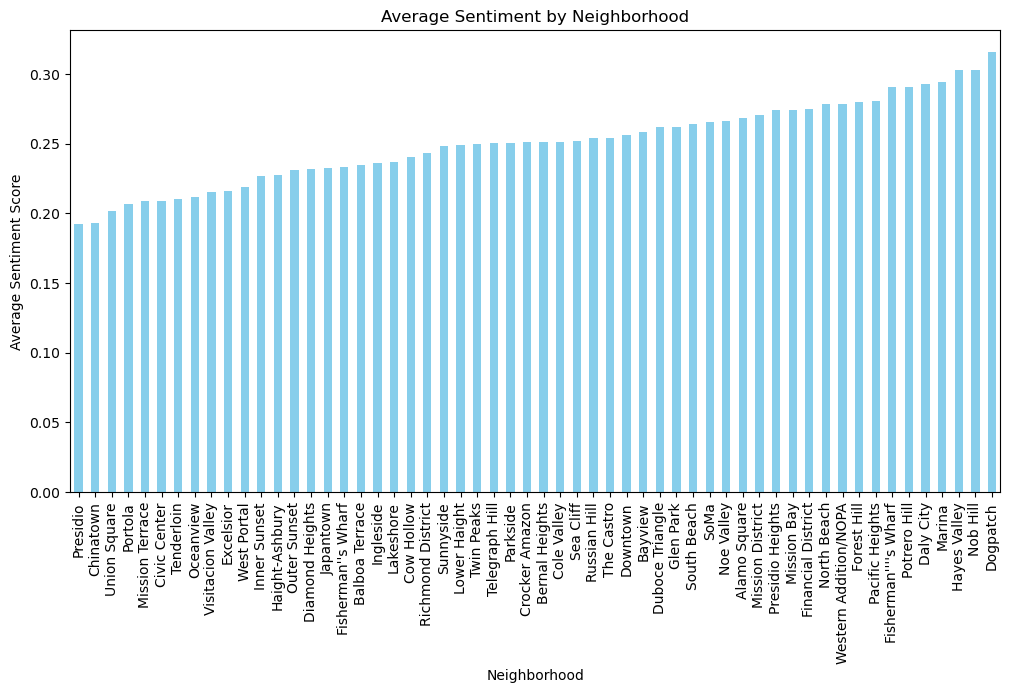

In [23]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the data
df = pd.read_csv('SFListings2.csv')

# Function to get the sentiment
def get_sentiment(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return None

# Applying the sentiment analysis function
df['description_sentiment'] = df['description'].apply(get_sentiment)

# Display average sentiment by neighborhood if 'neighbourhood' is available
if 'neighbourhood' in df.columns:
    average_sentiment = df.groupby('neighbourhood')['description_sentiment'].mean()
    print("Average Sentiment by Neighborhood:")
    print(average_sentiment.sort_values(ascending=False).head(10))  # Top 10 neighborhoods by average sentiment

    # Optional: Plot the results
    average_sentiment.sort_values().plot(kind='bar', figsize=(12, 6), color='skyblue')
    plt.title('Average Sentiment by Neighborhood')
    plt.xlabel('Neighborhood')
    plt.ylabel('Average Sentiment Score')
    plt.show()



In [24]:
import re
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [26]:
df2 = pd.read_csv('reviews.csv')

In [27]:
df2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818.0,1191.0,3/30/2009,10952,Lam,Daniel is really cool. The place was nice and ...
1,515749.0,1671407.0,7/9/2012,2640670,Gregory,If you want the authentic Amsterdam houseboat ...
2,515749.0,1715674.0,7/15/2012,1032804,Michael,Unique and luxurious to be sure. I couldn't re...
3,2818.0,1771.0,4/24/2009,12798,Alice,Daniel is the most amazing host! His place is ...
4,515749.0,1963378.0,8/12/2012,503786,Brian,My wife and I recently stopped in Amsterdam fo...


In [28]:
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Taghi
[nltk_data]     Jalilov\AppData\Roaming\nltk_data...


True

In [29]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming the dataset has a column named 'comments' containing the user reviews
comments = df2['comments']

# Handle NaN values in the 'comments' column
comments = comments.fillna('')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to predict sentiment and categorize it as positive, neutral, or negative
def categorize_interest(text):
    sentiment_score = sia.polarity_scores(text)['compound']

    if sentiment_score >= 0.2:
        return 'Positive'
    elif sentiment_score <= -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# Add a new column 'interest' to the dataframe with predicted interests
df2['interest'] = comments.apply(categorize_interest)

# Save the result
df2_review = df2[['comments', 'interest']]

# Display the dataframe with the 'interest' column
df2_review.head(10)

,comments,interest
0,Daniel is really cool. The place was nice and ...,Positive
1,If you want the authentic Amsterdam houseboat ...,Positive
2,Unique and luxurious to be sure. I couldn't re...,Positive
3,Daniel is the most amazing host! His place is ...,Positive
4,My wife and I recently stopped in Amsterdam fo...,Positive
5,Nous avons pass 5 jours parfait chez Derk! Le ...,Positive
6,Location is Perfect with-in walking distance o...,Positive
7,We had such a great time in Amsterdam. Daniel ...,Positive
8,Very professional operation. Room is very clea...,Positive
9,Daniel is highly recommended. He provided all...,Positive


In [30]:
df2_review.interest.value_counts()

Positive    274621
Neutral      48184
Negative     20099
Name: interest, dtype: int64

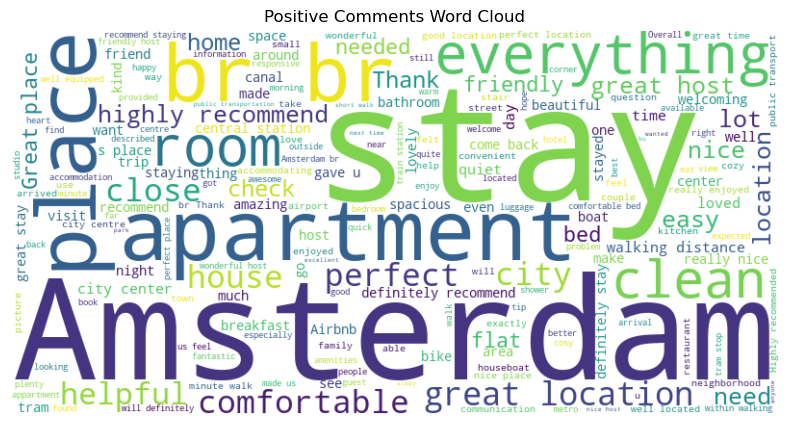

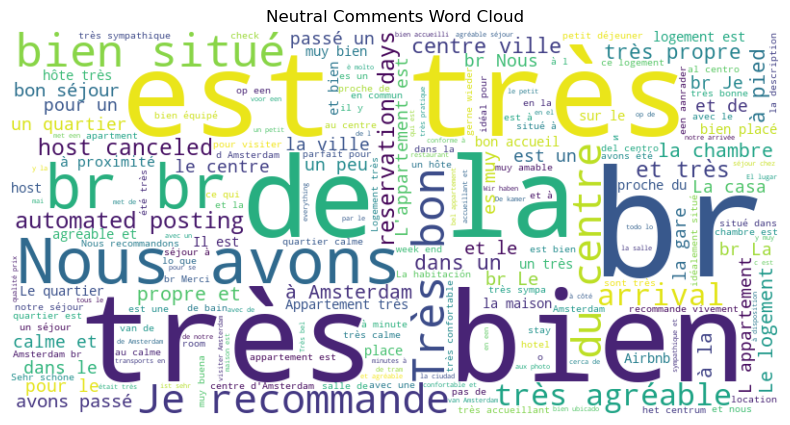

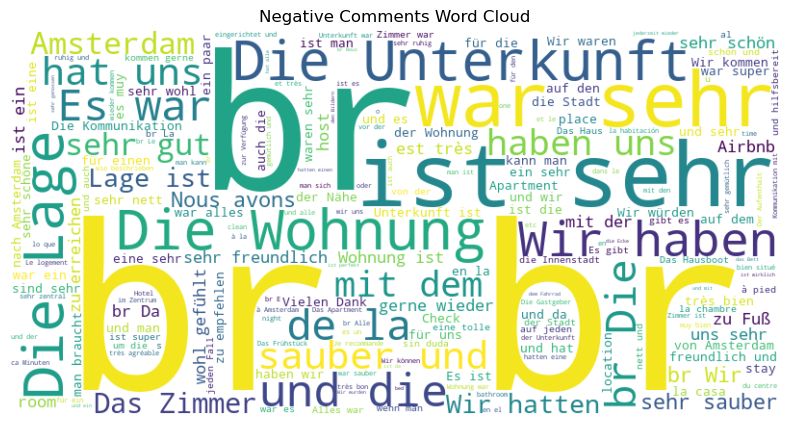

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter comments by sentiment
# Convert comments to strings before joining
positive_comments = ' '.join(df2[df2['interest'] == 'Positive']['comments'].astype(str))
neutral_comments = ' '.join(df2[df2['interest'] == 'Neutral']['comments'].astype(str))
negative_comments = ' '.join(df2[df2['interest'] == 'Negative']['comments'].astype(str))


# Function to generate and display word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for positive comments
generate_wordcloud(positive_comments, 'Positive Comments Word Cloud')

# Generate word cloud for neutral comments
generate_wordcloud(neutral_comments, 'Neutral Comments Word Cloud')

# Generate word cloud for negative comments
generate_wordcloud(negative_comments, 'Negative Comments Word Cloud')
